# Fast Hessian
- Actually **SURF** inside OpenCV
- Refer [paper](https://gurus.pyimagesearch.com/wp-content/uploads/2015/06/bay_2006.pdf)
- The actual keypoint detector algorithm behind SURF is called "Fast Hessian", while the image descriptor algorithm is called SURF.
- Used to locate repeatable blob like regions in an image. These regions can be corners, edges or both.

## How it works
- Built on same principles as DoG in that keypoints should be repeatable and recognizable at different scales of an image.
- Instead of computing DoG explicitly, Fast Hessian approximates DoG by utlizing **HAAR** wavelets and integral images.
- Gist is that we take sets of “box filters” and convolve them with the image in an attempt to approximate the Difference of Gaussians
- Refer to paper for math details.
- From there we construct Hessian matrix:
$$
H=
\begin{bmatrix}
L_{xx}&L_{xy}\\
L_{xy}&L_{yy}
\end{bmatrix}
$$
- Region is marked as keypoint if the candidate score is greater than a $3\times3\times3$ neighbor, which includes surrounding neighbors and octaves above and below it.

In [1]:
import sys
sys.path.append("../../")

In [2]:
import numpy as np
import cv2
import imutils
from cv_imshow import create_subplot, display_image

In [3]:
args = {
    "image":"../../images/fast_book_cover.png",
    "pen":"../../images/keypoint_detect/pen.jpg"
}

In [4]:
def keypoint_detector(imagePath):
    #load and convert image to gray
    image = cv2.imread(imagePath)
    orig = image.copy()
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    #detect fast hessian keypoints.
    detector = cv2.xfeatures2d.SURF_create()
    (kps, _) = detector.detectAndCompute(gray, None)
    
    print("# of keypoints: {}".format(len(kps)))
    
    #draw keypoints
    for kp in kps:
        r = int(0.5*kp.size)
        (x,y) = np.int0(kp.pt)
        cv2.circle(image, (x,y), r, (0,255,255), 2)
    
    display_image("Images", np.hstack([orig, image]))

# of keypoints: 1028


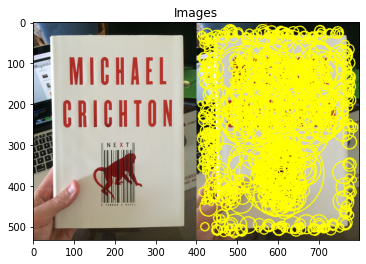

In [5]:
keypoint_detector(args["image"])

# of keypoints: 551


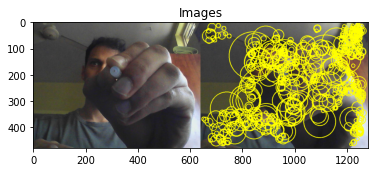

In [6]:
keypoint_detector(args["pen"])